In [1]:
import socket
import strax
import straxen
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import datetime
from multihist import Hist1d, Histdd
import time
import itertools
import os

from scipy import stats
from straxen import units
from scipy.optimize import curve_fit

import math
import cutax
from straxen.get_corrections import get_correction_from_cmt
from cutax.cuts import *

%load_ext autoreload
%autoreload 2
#import importlib
#importlib.reload(cutax)

import peaks_utility as psu
import drift_diffusion_utility as ddu
import s2widthcut_utility as wcu

In [2]:
straxen.print_versions()

module version                                               path   git
0   python  3.8.13  /opt/XENONnT/anaconda/envs/XENONnT_2022.06.3/b...  None
1    strax   1.2.3  /opt/XENONnT/anaconda/envs/XENONnT_2022.06.3/l...  None
2  straxen   1.7.1  /opt/XENONnT/anaconda/envs/XENONnT_2022.06.3/l...  None
3    cutax  1.12.0  /dali/lgrandi/xenonnt/software/cutax/v1.12.0/c...  None

In [3]:
st = cutax.contexts.xenonnt_v8(cut_list=[cutax.cut_lists.basic.BasicCuts,cutax.cut_lists.kr83m.Kr83mSelection])

In [4]:
dsets = st.select_runs(run_mode='tpc_kr83m',available='event_info')

Checking data availability:   0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
dsets0 = dsets[(dsets.end > pd.to_datetime('06/04/2021')) & (dsets.end < pd.to_datetime('06/08/2021'))]
dsets1 = dsets[(dsets.end > pd.to_datetime('06/18/2021')) & (dsets.end < pd.to_datetime('06/22/2021'))]
dsets2 = dsets[(dsets.end > pd.to_datetime('06/29/2021')) & (dsets.end < pd.to_datetime('07/02/2021'))]
dsets3 = dsets[(dsets.end > pd.to_datetime('07/18/2021')) & (dsets.end < pd.to_datetime('07/21/2021'))]
dsets4 = dsets[(dsets.end > pd.to_datetime('08/02/2021')) & (dsets.end < pd.to_datetime('08/04/2021'))]
dsets5 = dsets[(dsets.end > pd.to_datetime('08/10/2021')) & (dsets.end < pd.to_datetime('08/12/2021'))]
dsets6 = dsets[(dsets.end > pd.to_datetime('08/24/2021')) & (dsets.end < pd.to_datetime('08/26/2021'))]
dsets7 = dsets[(dsets.end > pd.to_datetime('09/06/2021')) & (dsets.end < pd.to_datetime('09/08/2021'))]
dsets8 = dsets[(dsets.end > pd.to_datetime('09/20/2021')) & (dsets.end < pd.to_datetime('09/22/2021'))]
dsets9 = dsets[(dsets.end > pd.to_datetime('10/04/2021')) & (dsets.end < pd.to_datetime('10/06/2021'))]
dsets10 = dsets[(dsets.end > pd.to_datetime('10/18/2021')) & (dsets.end < pd.to_datetime('10/21/2021'))]
dsets11 = dsets[(dsets.end > pd.to_datetime('11/01/2021')) & (dsets.end < pd.to_datetime('11/03/2021'))]
dsets12 = dsets[(dsets.end > pd.to_datetime('11/10/2021')) & (dsets.end < pd.to_datetime('11/14/2021'))]
dsets13 = dsets[(dsets.end > pd.to_datetime('11/28/2021')) & (dsets.end < pd.to_datetime('12/01/2021'))]

In [6]:
krrun0 = dsets0.name.values[:]
krrun1 = dsets1.name.values[:]
krrun2 = dsets2.name.values[:]
krrun3 = dsets3.name.values[:]
krrun4 = dsets4.name.values[:]
krrun5 = dsets5.name.values[:]
krrun6 = dsets6.name.values[:]
krrun7 = dsets7.name.values[:]
krrun8 = dsets8.name.values[:]
krrun9 = dsets9.name.values[:]
krrun10 = dsets10.name.values[:]
krrun11 = dsets11.name.values[:]
krrun12 = dsets12.name.values[:]
krrun13 = dsets13.name.values[:]

033295, livetime 1802.49 s, tot. events: 69005, Kr events: 42910, Kr-rate: 23.81 Hz
033292, livetime 1802.37 s, tot. events: 69714, Kr events: 42950, Kr-rate: 23.83 Hz
033289, livetime 1800.70 s, tot. events: 69632, Kr events: 43128, Kr-rate: 23.95 Hz
033286, livetime 1804.14 s, tot. events: 69777, Kr events: 43195, Kr-rate: 23.94 Hz
033283, livetime 1799.96 s, tot. events: 69743, Kr events: 43300, Kr-rate: 24.06 Hz
033280, livetime 1804.49 s, tot. events: 70309, Kr events: 43618, Kr-rate: 24.17 Hz
033277, livetime 1801.13 s, tot. events: 69980, Kr events: 43198, Kr-rate: 23.98 Hz
033274, livetime 1803.78 s, tot. events: 69982, Kr events: 43282, Kr-rate: 24.00 Hz
033271, livetime 1802.70 s, tot. events: 70235, Kr events: 43359, Kr-rate: 24.05 Hz
033268, livetime 1803.74 s, tot. events: 70176, Kr events: 43542, Kr-rate: 24.14 Hz
033265, livetime 1804.11 s, tot. events: 70398, Kr events: 43605, Kr-rate: 24.17 Hz
033262, livetime 1804.73 s, tot. events: 70466, Kr events: 43538, Kr-rate: 2

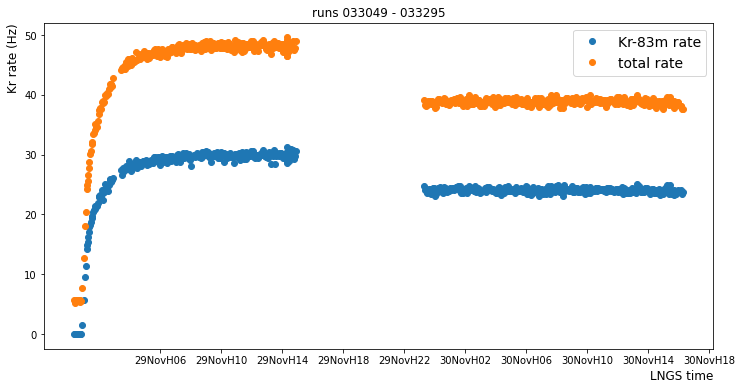

In [80]:
ddu.plot_kr_rate_vs_time(st,krrun13[:55])

In [9]:
#evKr0=st.get_df(krrun0[22:35], targets=(('event_info_double')), selection_str=('s2_a_area>2500','s2_a_area<20000'))
ddir = '/dali/lgrandi/dandrea/data'
#evKr13 = ddu.merge_runs_kr(st,krrun13[:55])
evKr13.to_pickle(f'{ddir}/SR0_v8_Kr83m_{krrun13[55]}_{krrun13[0]}_EventInfoDouble.pkl')

In [7]:
ddir = '/dali/lgrandi/dandrea/data'
evKr0 = pd.read_pickle(f'{ddir}/SR0_v8_Kr83m_{krrun0[35]}_{krrun0[22]}_EventInfoDouble.pkl')
evKr1 = pd.read_pickle(f'{ddir}/SR0_v8_Kr83m_{krrun1[48]}_{krrun1[32]}_EventInfoDouble.pkl')
evKr2 = pd.read_pickle(f'{ddir}/SR0_v8_Kr83m_{krrun2[24]}_{krrun2[9]}_EventInfoDouble.pkl')
evKr3 = pd.read_pickle(f'{ddir}/SR0_v8_Kr83m_{krrun3[8]}_{krrun3[0]}_EventInfoDouble.pkl')
evKr4 = pd.read_pickle(f'{ddir}/SR0_v8_Kr83m_{krrun4[6]}_{krrun4[0]}_EventInfoDouble.pkl')
evKr5 = pd.read_pickle(f'{ddir}/SR0_v8_Kr83m_{krrun5[7]}_{krrun5[0]}_EventInfoDouble.pkl')
evKr6 = pd.read_pickle(f'{ddir}/SR0_v8_Kr83m_{krrun6[14]}_{krrun6[0]}_EventInfoDouble.pkl')
evKr7 = pd.read_pickle(f'{ddir}/SR0_v8_Kr83m_{krrun7[16]}_{krrun7[0]}_EventInfoDouble.pkl')
evKr8 = pd.read_pickle(f'{ddir}/SR0_v8_Kr83m_{krrun8[15]}_{krrun8[0]}_EventInfoDouble.pkl')
evKr9 = pd.read_pickle(f'{ddir}/SR0_v8_Kr83m_{krrun9[14]}_{krrun9[0]}_EventInfoDouble.pkl')
evKr10 = pd.read_pickle(f'{ddir}/SR0_v8_Kr83m_{krrun10[63]}_{krrun10[0]}_EventInfoDouble.pkl')
evKr11 = pd.read_pickle(f'{ddir}/SR0_v8_Kr83m_{krrun11[16]}_{krrun11[0]}_EventInfoDouble.pkl')
evKr12 = pd.read_pickle(f'{ddir}/SR0_v8_Kr83m_{krrun12[50]}_{krrun12[10]}_EventInfoDouble.pkl')
evKr13 = pd.read_pickle(f'{ddir}/SR0_v8_Kr83m_{krrun13[55]}_{krrun13[0]}_EventInfoDouble.pkl')

In [8]:
ev_list = [evKr0,evKr1,evKr2,evKr3,evKr4,evKr5,evKr6,evKr7,evKr8,evKr9,evKr10,evKr11,evKr12,evKr13]

In [9]:
def diffusion_analysis_kr(ev, title = 'Kr83m', fit_range = (50,2000), far = True, plot = False ):
    #if(plot): ddu.plot_area_width_aft(ev, title)
    
    ######### Kr selection #########
    KrSelection = st.get_single_plugin('030000', 'cut_Kr_SingleS1S2')
    mask = KrSelection.cut_by(ev)
    #mask = ddu.mask_KrSingleS1(ev)
    
    ######### Perpendicular Wires selection #########
    #FarWires = st.get_single_plugin('030000', 'cut_far_wires')
    #NearWires = st.get_single_plugin('030000', 'cut_near_wires')
    #maskFW = FarWires.cut_by(ev)
    #maskNW = NearWires.cut_by(ev)
    maskFW, maskNW = wcu.mask_S2Width_vs_pos_kr(ev)
    if far: evD = ev[mask & maskFW]
    else: evD = ev[mask & maskNW]
    #maskFV = ev['cut_fiducial_volume']
    #maskFV = ddu.mask_FV(ev)
    if(plot):
        ddu.plot_s2width_dt_kr(evD, title,width='90p',wlim = (0,30000))
        ddu.plot_s2width_dt_kr(evD, title,width='90p',tlim = (0,200), wlim = (0,7000))
    #    ddu.plot_area_width_aft_kr(evD, title)
    #    wcu.plot_r2z_xy(evD,title)
    vd, vd_err, cathodedt, gatedt, s2shift = ddu.drift_velocity_kr(evD,title,
                                                                   binning=2000,w=4,plot=plot)
    d, d_err, par, par_err = ddu.diffusion_constant_kr(evD,title,fit_range=fit_range,vd = vd,plot=plot)
    return vd, vd_err, d, d_err, cathodedt, gatedt, s2shift, par, par_err
    #par = (d* units.cm**2 / units.s,vd* units.mm / units.us,gatedt*units.us)

/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Drift velocity = 0.674 +/- 0.003 mm/us


/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:392: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)


Diffusion constant = 45.67 +/- 0.13 cm2/s, tGate = 15.15 us


(0.6744228665256748,
 0.003056519864706837,
 45.67104838695319,
 0.13150835667668037,
 2206.5057528764382,
 4.623115577889448,
 5.9296482412060305,
 array([4.56710484e-05, 1.51461282e+01]),
 array([1.31508357e-07, 2.03647100e+00]))

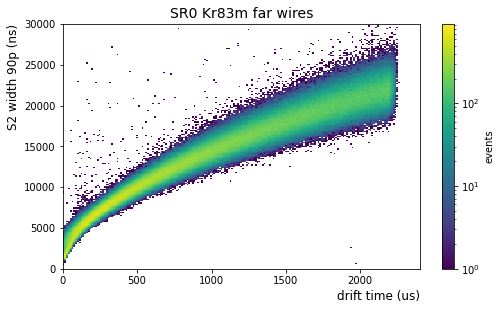

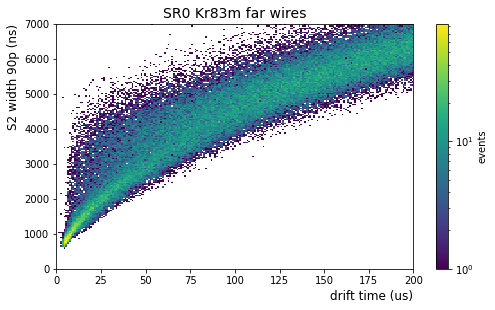

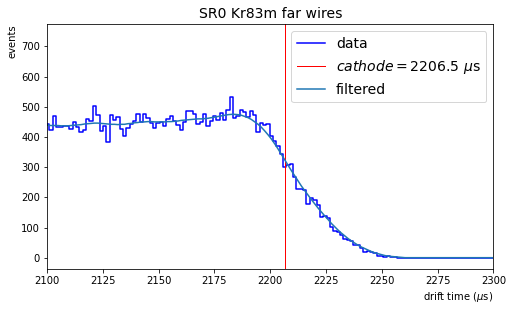

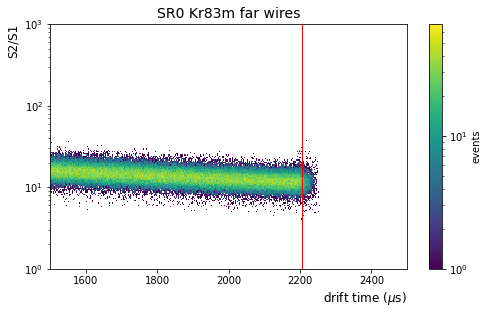

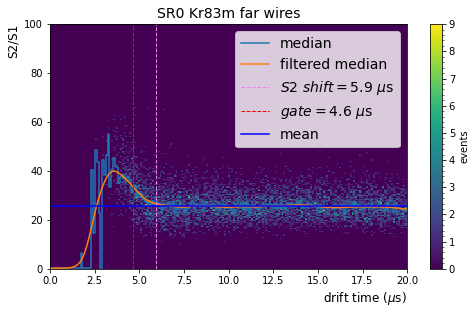

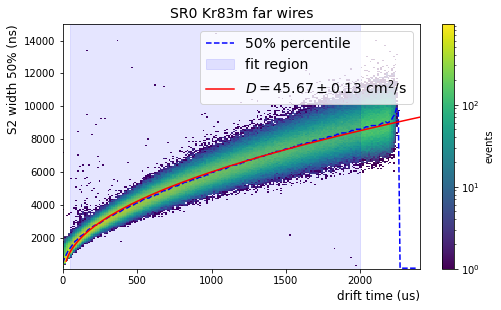

In [10]:
diffusion_analysis_kr(evKr0, title = 'SR0 Kr83m far wires', fit_range = (50,2000), plot = 1)

In [28]:
def analysis(ev_list):
    nn = len(ev_list)
    runs, vd, vd_err, times = np.zeros(nn), np.zeros(nn), np.zeros(nn), np.zeros(nn)
    d, d_err, par, par_err = np.zeros(nn), np.zeros(nn), np.zeros(nn), np.zeros(nn)
    cc, gg, ss, tGate, tGate_err = np.zeros(nn), np.zeros(nn), np.zeros(nn), np.zeros(nn), np.zeros(nn)
    for i, ev in enumerate(ev_list):
        runs[i] = i
        times[i] = ev['time'].min()
        vd[i], vd_err[i], d[i], d_err[i], cc[i], gg[i], ss[i], par, par_err = diffusion_analysis_kr(ev)
        tGate[i], tGate_err[i] = par[1]/units.ns, par_err[1]/units.ns
        print(f'run {i}, {datetime.datetime.fromtimestamp(times[i]/1e9)}, {vd[i]:.3f} mm/us, {d[i]:.2f} cm2/s, {cc[i]:.2f} us, {gg[i]:.2f} us, {ss[i]:.2f} us, {tGate[i]:.2f} us')
    return vd, vd_err, d, d_err, cc, gg, ss, tGate, tGate_err, times

In [30]:
vd, vd_err, d, d_err, cc, gg, ss, tGate, tGate_err, times = analysis(ev_list)

/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:392: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)
/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


run 0, 2021-06-05 05:33:26.012711, 0.674 mm/us, 45.67 cm2/s, 2206.51 us, 4.62 us, 5.93 us, 15.15 us


/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:392: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)
/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


run 1, 2021-06-18 18:18:03.035643, 0.673 mm/us, 45.51 cm2/s, 2211.74 us, 4.42 us, 6.23 us, 14.65 us


/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:392: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)
/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


run 2, 2021-06-29 15:00:09, 0.674 mm/us, 45.65 cm2/s, 2207.25 us, 4.32 us, 6.13 us, 13.96 us


/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:392: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)
/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


run 3, 2021-07-18 18:09:07.044018, 0.675 mm/us, 45.59 cm2/s, 2204.26 us, 3.92 us, 6.13 us, 15.04 us


/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:392: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)
/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


run 4, 2021-08-02 06:45:35.021693, 0.677 mm/us, 45.85 cm2/s, 2198.28 us, 4.32 us, 6.03 us, 14.99 us


/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:392: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)
/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


run 5, 2021-08-10 05:01:18.012075, 0.675 mm/us, 45.63 cm2/s, 2205.76 us, 4.52 us, 6.13 us, 15.08 us


/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:392: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)
/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


run 6, 2021-08-24 04:59:30, 0.676 mm/us, 45.83 cm2/s, 2202.02 us, 4.52 us, 6.03 us, 14.88 us


/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:392: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)
/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


run 7, 2021-09-06 04:54:47.052645, 0.676 mm/us, 45.69 cm2/s, 2202.52 us, 4.82 us, 5.83 us, 14.99 us


/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:392: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)
/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


run 8, 2021-09-20 05:14:27.018552, 0.673 mm/us, 45.41 cm2/s, 2210.25 us, 4.62 us, 5.73 us, 15.15 us


/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:392: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)
/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


run 9, 2021-10-04 06:37:18.027199, 0.675 mm/us, 45.58 cm2/s, 2205.76 us, 4.62 us, 5.73 us, 15.39 us


/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:392: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)
/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


run 10, 2021-10-18 06:33:06.012307, 0.675 mm/us, 45.57 cm2/s, 2205.76 us, 4.52 us, 6.13 us, 14.29 us


/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:392: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)
/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


run 11, 2021-11-01 05:33:51.038108, 0.676 mm/us, 45.62 cm2/s, 2202.77 us, 4.62 us, 6.03 us, 14.52 us


/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:392: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)
/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


run 12, 2021-11-10 05:00:59.032667, 0.674 mm/us, 45.51 cm2/s, 2206.51 us, 4.42 us, 6.13 us, 14.20 us
run 13, 2021-11-28 14:58:13.008615, 0.675 mm/us, 45.61 cm2/s, 2205.76 us, 4.62 us, 6.13 us, 14.03 us


/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:392: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)


In [31]:
def plot_results_vs_runs(dates, vd, vd_err, d, d_err, cc, gg, ss, tGate, tGate_err):
    # diffusion constant
    plt.figure(figsize=(12,6))
    plt.xlabel("date", ha='right', x=1,fontsize=14)
    plt.ylabel("diffusion constant (cm$^2$/s)", ha='right', y=1,fontsize=14)
    plt.errorbar(dates, d, yerr = d_err, fmt='s',c='b',label='diffusion constant')
    mean1 = d[d>0].mean()
    std1 = d[d>0].std()/np.sqrt(np.size(d))+d_err[d>0].mean()
    plt.axhline(mean1,color='r',label=f'$D = {mean1:.2f} \pm {std1:.2f}$ cm$^2$/s')
    plt.xticks(rotation=30)
    plt.legend(fontsize=14)
    
    # cathodedt
    plt.figure(figsize=(12,6))
    plt.xlabel("date", ha='right', x=1,fontsize=14)
    plt.ylabel("cathode drift time ($\mu$s)", ha='right', y=1,fontsize=14)
    plt.errorbar(dates,cc,yerr=10,fmt='s',color='b',label='cathode drift time')
    cm1, cs1 = cc.mean(), cc.std()/np.sqrt(np.size(cc))
    plt.axhline(cm1, color='r',label=f'$cathode = {cm1:.1f} \pm {cs1:.1f}$ mm/$\mu$s')
    plt.xticks(rotation=30)
    plt.legend(fontsize=14)

    # gatedt
    plt.figure(figsize=(12,6))
    plt.xlabel("date", ha='right', x=1,fontsize=14)
    plt.ylabel("gate drift time ($\mu$s)", ha='right', y=1,fontsize=14)
    plt.errorbar(dates,gg,yerr=1,fmt='s',color='g',label='gate drift time')
    gm1, gs1 = gg[gg>0].mean(), (gg[gg>0].max()-gg[gg>0].min())/2
    plt.axhline(gm1,color='r',label=f'$gate = {gm1:.1f} \pm {gs1:.1f}$ mm/$\mu$s')
    plt.xticks(rotation=30)
    plt.legend(fontsize=14)

    # s2 shift time
    plt.figure(figsize=(12,6))
    plt.xlabel("date", ha='right', x=1,fontsize=14)
    plt.ylabel("S2 shifted time ($\mu$s)", ha='right', y=1,fontsize=14)
    plt.errorbar(dates,ss,yerr=1,fmt='s',color='violet',label='S2 shifted time')
    sme1, sst1 = ss[ss>0].mean(), (ss[ss>0].max()-ss[ss>0].min())/2
    plt.axhline(sme1,color='r',label=f'$S2 shift = {sme1:.1f} \pm {sst1:.1f}$ mm/$\mu$s')
    plt.legend(fontsize=14)
    plt.xticks(rotation=30)

    # drift velocity
    plt.figure(figsize=(12,6))
    plt.xlabel("date", ha='right', x=1,fontsize=14)
    plt.ylabel("drift velocity (mm/$\mu$s)", ha='right', y=1,fontsize=14)
    plt.errorbar(dates,vd,yerr=vd_err,fmt='s',color='r',label='drift velocity')
    m1 = vd[vd>0].mean()
    s1 = vd[vd>0].std()/np.sqrt(np.size(vd))+vd_err[vd>0].mean()+vd_err[vd>0].mean()
    plt.axhline(m1,color='r',label=f'$v_D = {m1:.3f} \pm {s1:.3f}$ mm/$\mu$s')
    plt.xticks(rotation=30)
    plt.legend(fontsize=14)
    
    # tGate
    plt.figure(figsize=(12,6))
    plt.xlabel("date", ha='right', x=1,fontsize=14)
    plt.ylabel("tGate ($\mu$s)", ha='right', y=1,fontsize=14)
    plt.errorbar(dates,tGate,yerr=tGate_err,fmt='s',color='g',label='tGate')
    tGatem, tGates = tGate[tGate>0].mean(), (tGate[tGate>0].max()-tGate[tGate>0].min())/2
    plt.axhline(tGatem,color='r',label=f'$tGate = {tGatem:.1f} \pm {tGates:.1f}~\mu$s')
    plt.legend(fontsize=14)
    plt.xticks(rotation=30)
    print(f'vD = {m1:.3f} +/- {s1:.3f} mm/us')
    print(f'D = {mean1:.2f} +/- {std1:.2f} cm2/s')
    return mean1, std1, m1, s1

vD = 0.675 +/- 0.006 mm/us
D = 45.62 +/- 0.16 cm2/s


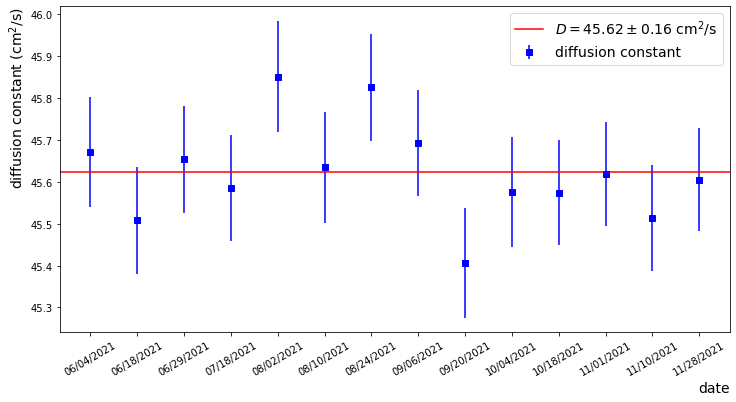

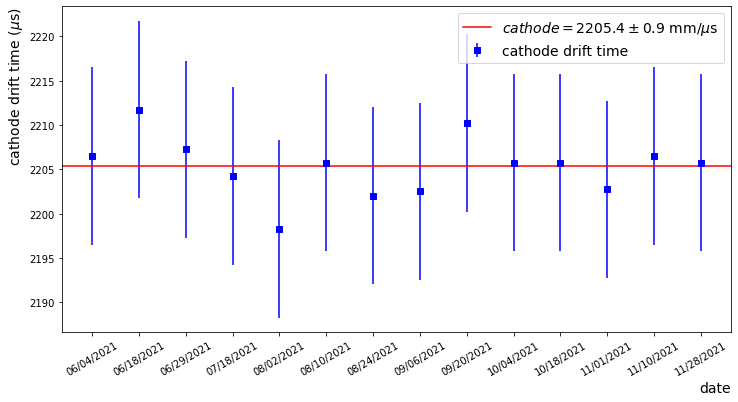

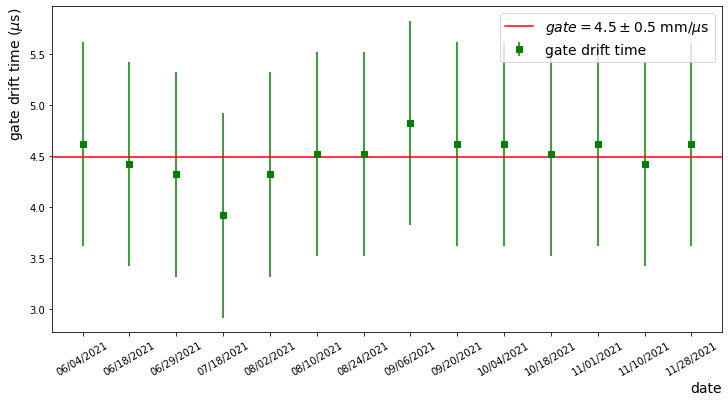

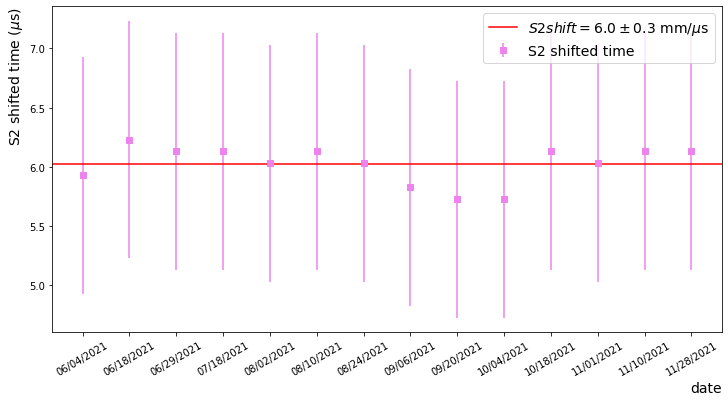

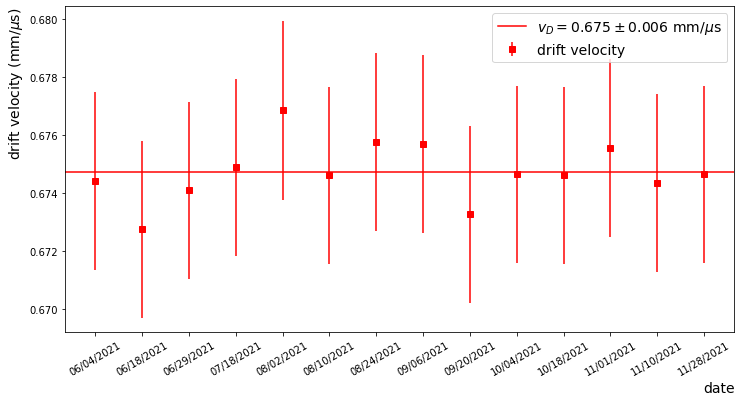

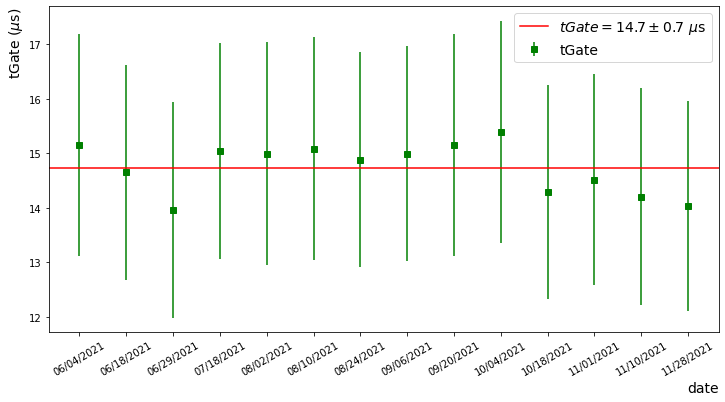

In [32]:
dates = ['06/04/2021','06/18/2021','06/29/2021','07/18/2021','08/02/2021','08/10/2021','08/24/2021','09/06/2021','09/20/2021','10/04/2021','10/18/2021','11/01/2021','11/10/2021','11/28/2021']
mean1, std1, m1, s1 = plot_results_vs_runs(dates, vd, vd_err, d, d_err, cc, gg, ss, tGate, tGate_err)

# S2 Width Cut

In [33]:
# FAR FROM WIRES 1-99%
cut_far = (( 0.75785949 , 3.18263529 , 1.26349891 ),
          ( 4.74467848 , 1.34106577 , 1.99650474 , 1.02559667 ))
# NEAR WIRES 5-99%
cut_near = (( 0.7742574 , 2.92714807 , 1.22338626 ),
           ( 4.74467848 , 1.34106577 , 1.99650474 , 1.02559667 ))
vd = get_correction_from_cmt('024075',('electron_drift_velocity', 'ONLINE', True))
gd = get_correction_from_cmt('024075',('electron_drift_time_gate', 'ONLINE', True))
dc = get_correction_from_cmt('024075',('electron_diffusion_cte', 'ONLINE', True))
par = (dc,vd,gd)
print(par)

(4.566e-08, 6.77e-05, 2700.0)


In [34]:
def apply_cut(events, title = 'Kr-83m', near = False, name = None, plot = False):
    KrSelection = st.get_single_plugin('030000', 'cut_Kr_SingleS1S2')
    mask = KrSelection.cut_by(events)
    maskFW, maskNW = wcu.mask_S2Width_vs_pos_kr(events)
    if near: ev = events[mask & maskNW]
    else: ev = events[mask & maskFW]
    cut_mask_kr = wcu.S2WidthCut(ev, title=title, mod_par=par, bins=400, name = name,
                             wrange=(0,6),arange=(2.6,4.8), plot = plot, perc_plot=0,
                             ext_par=cut_far, near_wires=near, wire_model=near,kr=1 )
    acc_kr = wcu.get_acceptance_kr(ev, cut_mask_kr[1], title=title, alim=(0.95,0.97),bins=2, plot = plot, name = name)
    return acc_kr

/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Lower and higher boundary provided externally
param_parabola_low: [0.00487747 0.09634786 0.19632401]
param_parabola_high: [ 0.12086553 -1.2295208   4.37596581]
Cut: total 772395, survived 742266 -> 96.10%


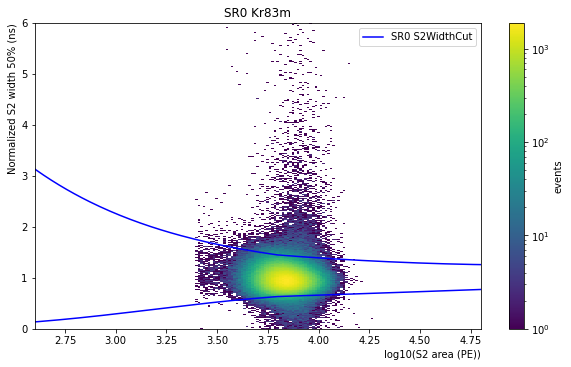

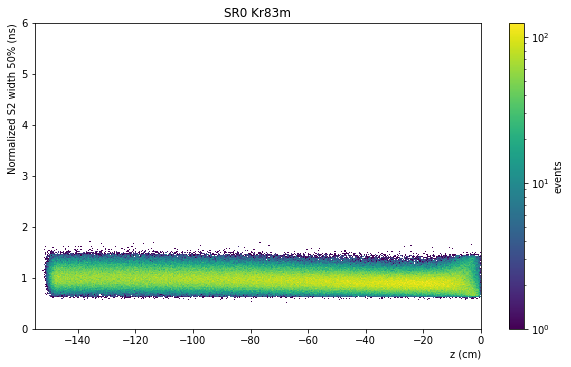

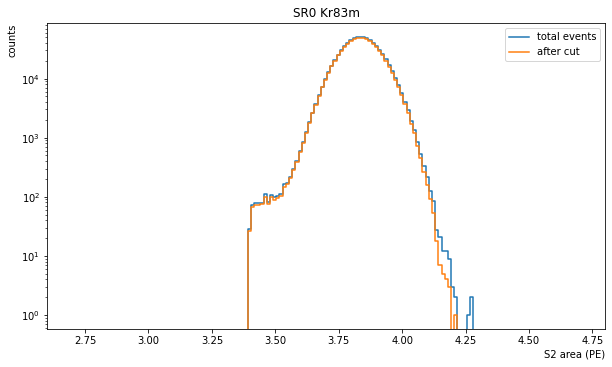

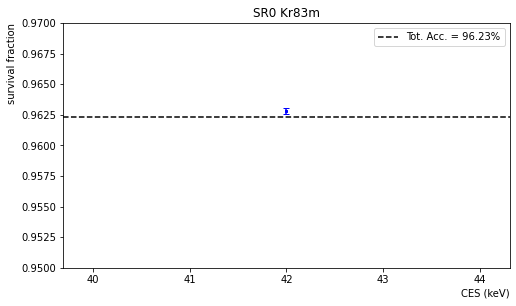

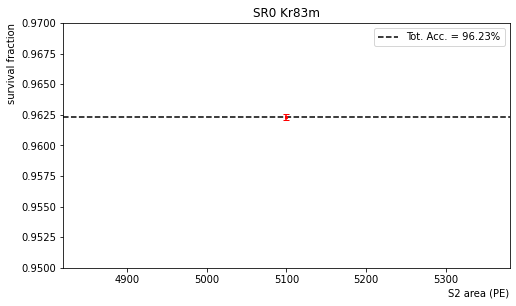

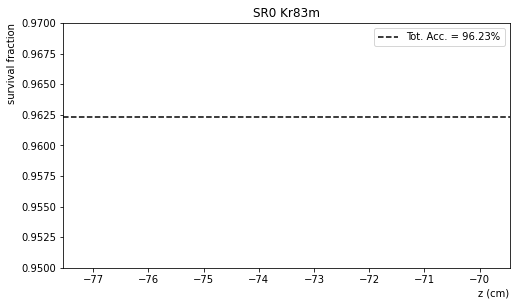

In [35]:
acc_kr = apply_cut(evKr0, title = 'SR0 Kr83m', plot = 1)

Loading event_info_double: |          | 0.00 % [00:00<?]

/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Lower and higher boundary provided externally
param_parabola_low: [0.00487747 0.09634786 0.19632401]
param_parabola_high: [ 0.12086553 -1.2295208   4.37596581]
Cut: total 65205, survived 62708 -> 96.17%


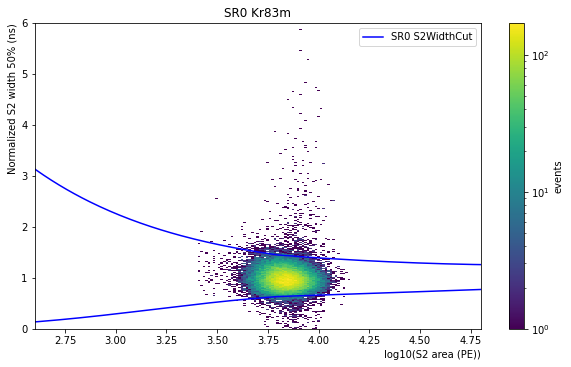

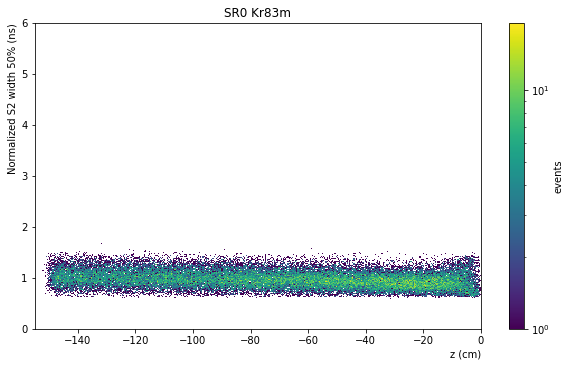

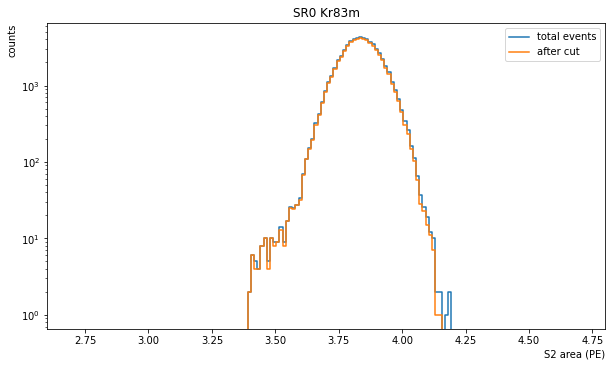

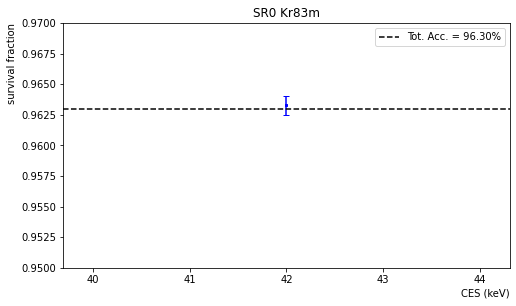

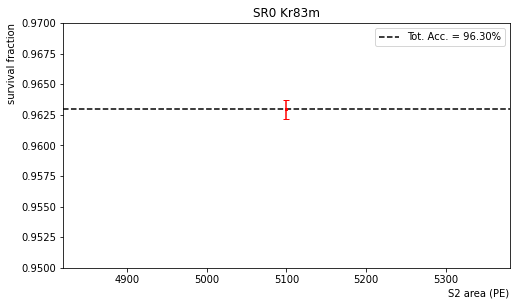

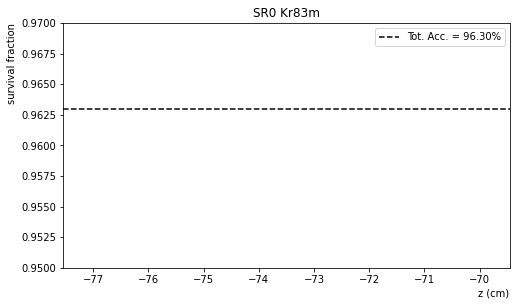

In [128]:
ev = st.get_df(krrun0[22], 'event_info_double',
                selection_str=('s2_a_area>2500','s2_a_area<20000'))
acc_kr = apply_cut(ev, title = 'SR0 Kr83m', plot = 1)

In [132]:
def analysis_acc(ev_list,plot=False):
    nn = len(ev_list)
    acc_kr,  acc_kr_err_l, acc_kr_err_h = np.zeros(nn), np.zeros(nn), np.zeros(nn)
    times = np.zeros(nn)
    for i, ev in enumerate(ev_list):
        times[i] = ev['time'].min()
        data = apply_cut(ev)
        acc_kr[i],  acc_kr_err_l[i], acc_kr_err_h[i] = data['e_ces_acc'], data['e_ces_acc_err_l'], data['e_ces_acc_err_h']
        print(acc_kr[i],  acc_kr_err_l[i], acc_kr_err_h[i])
    if plot:
        plt.figure(figsize=(8,4.5))
        plt.xlabel("date", ha='right', x=1)
        plt.ylabel("S2WidthCut acceptance", ha='right', y=1)
        plt.errorbar(times,acc_kr,yerr=(acc_kr_err_l,acc_kr_err_h),fmt='s',color='b',label='Kr83m acceptance')
        acc_kr_m, acc_kr_s = acc_kr[acc_kr>0].mean(), acc_kr[acc_kr>0].std()/np.sqrt(np.size(acc_kr))
        plt.axhline(acc_kr_m,color='r',label=f'$acceptance = {acc_kr_m:.3f} \pm {acc_kr_s:.3f}$')
        plt.legend()
        plt.xticks(rotation=30)
    return acc_kr, acc_kr_err_l, acc_kr_err_h, times
def analysis_acc_runs(runs,plot=False):
    all_runs = np.concatenate(runs)
    nn = len(all_runs)
    acc_kr,  acc_kr_err_l, acc_kr_err_h = np.zeros(nn), np.zeros(nn), np.zeros(nn)
    times = np.zeros(nn)
    for i, run_id in enumerate(all_runs):
        ev = st.get_df(run_id, 'event_info_double',progress_bar=False,
                selection_str=('s2_a_area>2500','s2_a_area<20000'))
        times[i] = ev['time'].min()
        data = apply_cut(ev)
        acc_kr[i],  acc_kr_err_l[i], acc_kr_err_h[i] = data['e_ces_acc'], data['e_ces_acc_err_l'], data['e_ces_acc_err_h']
        print(acc_kr[i],  acc_kr_err_l[i], acc_kr_err_h[i])
    if plot:
        plt.figure(figsize=(8,4.5))
        plt.xlabel("date", ha='right', x=1)
        plt.ylabel("S2WidthCut acceptance", ha='right', y=1)
        plt.errorbar(times,acc_kr,yerr=(acc_kr_err_l,acc_kr_err_h),fmt='s',color='b',label='Kr83m acceptance')
        acc_kr_m, acc_kr_s = acc_kr[acc_kr>0].mean(), acc_kr[acc_kr>0].std()/np.sqrt(np.size(acc_kr))
        plt.axhline(acc_kr_m,color='r',label=f'$acceptance = {acc_kr_m:.3f} \pm {acc_kr_s:.3f}$')
        plt.legend()
        plt.xticks(rotation=30)
    return acc_kr, acc_kr_err_l, acc_kr_err_h, times

In [135]:
acc_kr, acc_kr_err_l, acc_kr_err_h, times = analysis_acc(ev_list)

/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9628333761641625 0.00022309144218668475 0.00022181536547638547


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9640721152966346 0.0001705470134263365 0.0001697730523519958


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9624179452398675 0.00011514974297432978 0.00011481224036591353


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9644597526800339 0.0002337636511980934 0.00023229701929350366


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9648603026894996 0.00026602002781672685 0.00026410099215157246


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9646229709586126 0.00025739332977348095 0.00025560849727557233


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9650715229505371 0.00023028048415418834 0.0002288313528236996


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9651525050046934 0.0002182690584616731 0.00021696338726540088


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9653218722649904 0.0002325578200237377 0.000231069047733512


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9650158959911086 0.00025144863630210956 0.00024972519110655345


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649706883774261 0.00012195832792827321 0.00012155123370727328


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9652319258724963 0.00024290485540545692 0.00024128568379588877


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9651401473007524 0.0001552482033384539 0.0001545861494991474


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9644082590511575 0.00013329208760037847 0.0001328139828415953


In [145]:
a_kr, a_kr_err_l, a_kr_err_h, tt = analysis_acc_runs(runs)

/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.963285149834962 0.0007741072033948804 0.0007588793720566533


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9610438101559907 0.001286566530951605 0.0012476746409189055


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9619560820104536 0.0007852291932108901 0.0007701208740632515


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9634898980055869 0.000771619344309582 0.000756402008359025


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.963283572338549 0.0007758950678582455 0.0007605985316694319


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9639029985253155 0.0007709705653135002 0.0007556027778800045


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9632532190245578 0.0007768767646191277 0.0007615548794970284


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9624647748869519 0.0007852258513861843 0.0007699102861670193


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9637788463138279 0.000778273175361277 0.0007626715323424405


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9621716167089649 0.0008066480498027939 0.0007906250480834709


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.962892783830728 0.0008087792219003687 0.0007923561571178128


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9619680048294597 0.0008490636664494344 0.0008314352292821958


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.961904138863448 0.0009150631333233461 0.0008946719872919839


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9641739932167671 0.0007701245429088122 0.000754672851223881


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9636979350511825 0.0006319090192602461 0.0006215880917826988


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9636998448237641 0.0014464512456200396 0.0013940311696114538


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.963878003066962 0.0006192435756956494 0.0006092770871364284


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.964905354126911 0.000620060368023645 0.0006097710366913534


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9640769145270646 0.0006312175710256884 0.0006208086350388831


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9635178486110163 0.0006433878988524322 0.0006327470053031359


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9633657033203465 0.0006519389892650773 0.0006410630572276643


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9636756472849247 0.0006579969426853127 0.000646824633798726


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9643401251006379 0.0006646668044126836 0.000653054531340902


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9643315990993856 0.0006738178896200653 0.0006618908968292203


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9641584132370543 0.0006869532921928156 0.0006746238373817048


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9642311219810455 0.0007057899163946946 0.0006927579787233684


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.965035473365899 0.0007145249697780853 0.0007008626715648836


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.962361520990096 0.0007630814018830812 0.0007486456648910789


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9658184644498513 0.0007633092935371844 0.0007473894752250132


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9630597189512922 0.0005342689114641308 0.000526993147752064


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9628953628953629 0.0005354543576236992 0.0005281796391776172


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9619508766449295 0.000542204056251161 0.0005349357169831537


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9623790306782118 0.0005402298833671049 0.0005329299158427503


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9630171186796606 0.0005338453601129167 0.0005265895473360871


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9621949224501243 0.000539864131113954 0.0005326102104711294


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.961514881067867 0.0005433932213783077 0.000536177838056151


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9619807884948399 0.0005404382785290096 0.0005332109156269693


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9624980520492442 0.0005378732953162935 0.0005306127665014593


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9628597885038868 0.0005350459159546572 0.0005277892784335547


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.962499214972053 0.0005399083737499533 0.0005325931367582415


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9623238469087341 0.0005411208861904049 0.0005338080243432186


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9619544056766443 0.0005469565953793998 0.0005395609029313908


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9617156922083686 0.0005529013798623028 0.0005453938802233438


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9631189602371159 0.0005479916490186421 0.0005403288672046758


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9647540362313348 0.0006173106616299551 0.0006071556427799107


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.964265510088629 0.0006943462483920415 0.0006817154744765963


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9658200957544627 0.0006009506752561178 0.0005910158869038007


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9648192459419259 0.0006153251114024982 0.0006052155377094248


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9651406125851901 0.0006244738055016796 0.0006139679924078711


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9630368061093791 0.000667559557216979 0.0006562660430402545


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9634542853426974 0.0007273305740657099 0.0007138001203544908


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9632585079672856 0.000962128377299587 0.0009387904395236069


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9651892649936101 0.0006274209696387478 0.000616802024480112


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.964522880253408 0.0006331649272289797 0.0006225589384599717


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9654242389165413 0.0006328540773754554 0.0006219785127462574


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9641916037974226 0.0006562202903158676 0.0006449450617266317


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9658739038796804 0.00066751409728949 0.000655271015803427


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9637477055509842 0.0007589031861271467 0.0007440701611247658


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.964366207207421 0.000649975677647685 0.0006388563182647689


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9652193599123037 0.0006440399720286649 0.0006328488322721038


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9644856648810748 0.0006553175112787857 0.0006439785268727016


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9648553132362714 0.0007303161119571744 0.0007161261677683939


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9642285729151762 0.000682452308177206 0.0006702575520373122


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9652428038417342 0.0007036827909807641 0.0006903462918768088


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.963834475160946 0.000791327064491254 0.0007751808341051047


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.966179648682096 0.0007948861825494147 0.0007774594499982967


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9656182632248079 0.0008000565125222403 0.0007826956055665413


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9659268929503917 0.0008016155579064765 0.0007840294367424949


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9650933658628131 0.0008133830823230381 0.0007957198230106322


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9646373702157005 0.0008269979424095908 0.0008089850709043223


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9650350980653262 0.0008196874570246537 0.0008017839318184006


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9646598632869232 0.0008313313369100461 0.0008131206819742554


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9635245656975703 0.000855604906910834 0.0008369373501877497


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9648377045459235 0.0008567736407794069 0.0008373526299082501


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.96560347475102 0.0008749367224882842 0.0008542462739075107


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9634279217395424 0.0009365724665084674 0.0009143333154872924


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.964821726355912 0.0009736127244968085 0.0009486611693740876


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9653270291568163 0.0013320467525954616 0.0012853309142539793


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9667880711117522 0.001111280261651082 0.0010770500478173295


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9667645942002918 0.0008208199910098024 0.000801930109512794


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9647024924362484 0.0013256573924314008 0.0012801850263487458


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649715959349753 0.0008342464801901484 0.0008157459313492543


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9643729320939026 0.0008417356152480293 0.0008232251759420217


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9663175883790712 0.0008235881676040835 0.0008048257705317585


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9651260169085979 0.0008386179616168832 0.0008198431297091746


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9660065678176933 0.000827812667917649 0.000809034516165652


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9645371525123707 0.0008490417177268172 0.0008301262900499706


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9640125315322646 0.0008598662633189091 0.0008407580491197608


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.964447947563834 0.0008635016202334089 0.0008439969179936391


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9644240333537915 0.0008727119697055086 0.0008528096525972639


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.963873427042949 0.0008894874901324012 0.000869142742580653


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9659574468085106 0.0008872110397505351 0.0008657252220675149


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9672803609777284 0.0008974386933054967 0.0008745763258535266


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649728663048841 0.000989184149023714 0.0009633329563087933


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9642747151216507 0.0011190696746575801 0.0010867937135958794


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9654095500656917 0.0008690540197423546 0.0008487507429301155


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9638379638379638 0.0015433507216657816 0.0014836641113165072


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.964976100841758 0.0008660386095754591 0.0008461239297612444


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9655822425551743 0.000859601528984788 0.0008396299026258713


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649566783906666 0.0008724637131948265 0.0008522688810060908


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9659107974170296 0.0008613706398525878 0.0008411244368370374


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9667081919326431 0.0008523600539883658 0.0008320521458700103


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9648337595907929 0.0008863646393570956 0.0008656057866913702


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9664367000155283 0.0008698907828715852 0.0008489255108197202


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9659779365222896 0.0008839648755271101 0.000862620292304439


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9644801244224875 0.0009074297375361029 0.0008859077768762491


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9637522073211473 0.0009362268464006007 0.0009138041384665341


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9643677013674019 0.0009502552582880686 0.0009267681415500162


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9660332669429941 0.0009660107695239617 0.0009405643946683862


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.965497481678077 0.0010317382588433954 0.0010032368487407073


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.964538562746695 0.0015251190350311639 0.0014656635552782182


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9653189783529951 0.0008980222472098065 0.0008764249193772278


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649467126132499 0.0009007978181958531 0.0008793004788338887


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9643958957014557 0.000908044169483202 0.0008865447347138344


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9660793562708102 0.0008930077975041195 0.0008711672259319458


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9646616716849894 0.0009147227324615148 0.0008927470681880934


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9651939528887847 0.000910177913824084 0.0008880825923457403


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9665458336294928 0.0008983789987732083 0.0008759717584593263


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9647534668721109 0.0009282336386364776 0.0009055570557712223


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9639312039312039 0.0009481454782851451 0.0009250443429859034


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.964872637633525 0.0009579044392244995 0.0009337014415375933


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9658923452026901 0.0009656315972382812 0.0009403096265492294


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9638874443866644 0.0010309113783824042 0.001003721259604684


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9646384828131174 0.001091845929862445 0.0010607735210417246


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9655122305643012 0.0009216176561457345 0.0008987646584996956


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9654261018644189 0.000914697193939773 0.0008922359535727953


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9640356766088041 0.000935058089763019 0.0009125133701324284


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9674095829089789 0.0008872640359343098 0.0008648189905420267


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.964779694852417 0.0009217629755990941 0.0008993790151387016


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9656116420921186 0.000916372901664908 0.0008937090985525753


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.965644757246809 0.0009128946658732984 0.0008903777098147048


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.966737001825553 0.0008962711337641149 0.000873838900599222


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9645597978931312 0.0009258096362236845 0.0009033727392093738


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9654382279931258 0.0009156766322535592 0.000893160249854863


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.965222784085488 0.0009180335931658901 0.0008955436521101978


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9638015506825858 0.0009340320415933689 0.0009116819072831905


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9633589246848915 0.0009420636924297732 0.0009196102709514431


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9658688367640019 0.000911604535858257 0.0008890025217640485


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649199824400367 0.0012012084966001035 0.0011634617284933535


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9645319141336571 0.0011402112626173189 0.0011064900834729663


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649147660197384 0.0009170259712308892 0.0008947818228028925


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.965218224500551 0.0009200951613828057 0.0008975089340623743


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9655057012406474 0.0009155443037773825 0.0008929902379887222


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649633642807705 0.0009215188794367002 0.0008990290388914968


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9651520245929199 0.0009221396254598391 0.0008994979243821533


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9653863707333478 0.0009193069016085742 0.0008966489848618586


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649511555873242 0.0009208696635307767 0.0008984187564793356


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9643307855322999 0.0009281655274879785 0.0009057615570082778


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.965792063758792 0.0009139465457006501 0.0008912814138984926


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9636341900777047 0.0009385829597224893 0.0009161227180543019


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9647875402065346 0.0009299621417672155 0.0009071805197011784


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649353129326396 0.000921920993791292 0.000899429922360806


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649156533858797 0.0009253392357920776 0.0009026968753901299


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9635752042287362 0.0009416634930791146 0.0009190950074812188


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9639547858147771 0.0009416360418154079 0.000918830312121921


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9648399375365997 0.0009335483337381545 0.0009105596677395633


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9661050061050062 0.0009180422032127877 0.0008949662568402683


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9657313197506836 0.0009269517175660713 0.0009036906253606647


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9640688513072715 0.0009566992325624746 0.0009330968771464887


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9655119753620607 0.00094541128656489 0.0009213863655529453


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9663698271346255 0.0009481562886050066 0.0009233789068312515


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9652486680909754 0.0009787898615036816 0.0009532678279233764


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9654725938713854 0.0010074063350485885 0.0009802263448296378


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9648534253017714 0.0010616711338689022 0.001032078385920343


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9624472880616548 0.001181591070034127 0.0011474345334060443


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9607595631414302 0.0014917773409243162 0.0014402373830663118


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9691071082703855 0.001798239637370358 0.0017047961037197634


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9624793244537303 0.0018581164782660586 0.0017756174326258867


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9667344020471137 0.0016295871790349414 0.001557632972637557


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9660420796828036 0.001511036016476508 0.0014501118207230768


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9665053135258443 0.001396555577941383 0.0013435669896093572


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9654971044819699 0.001320781217375555 0.001274608621758766


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9636967861349487 0.0012541192111799049 0.0012144301497872823


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9631578947368421 0.0011915778679980615 0.001156186587873087


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9674593658406608 0.0010565484565389083 0.0010249023312129957


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9662039651636298 0.0010141897587876425 0.000986056304247862


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9654152075359014 0.000978496535151141 0.0009528668190327272


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9653673010026601 0.0009496638793361489 0.0009255277167870002


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.964421632448673 0.0009512386314987076 0.0009276680397440895


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9640465104698355 0.0009531948016675562 0.0009297764520110885


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649636864512897 0.0009445459227939157 0.0009209395327268721


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9640341675408362 0.0009548730818220719 0.0009313818115903594


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9644516259341547 0.0009549429783622942 0.0009311718267211999


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649918146329177 0.0009469318551653672 0.0009231892316088341


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9645748729343856 0.0009590595445937433 0.0009350033588800821


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9639149777558083 0.0009765815145139634 0.0009521119141555623


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9644453963749298 0.0009842112165802108 0.000958993984101264


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9632619053818314 0.000985201244002365 0.0009607497149214383


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649068958461223 0.0009555549983187861 0.0009314448043404866


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9662293737829251 0.0009393538778705857 0.0009151265345135329


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9662861083441882 0.0009370743054514241 0.0009129216334110568


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9646299790891009 0.0009575957568648263 0.000933574151774641


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9662478953503432 0.0009443816642490388 0.0009198859482618671


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9664088743066948 0.0009448102898731436 0.0009201755323083871


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9660848402376154 0.0009514898306440811 0.0009267505317646085


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9636330071995569 0.0009869896061818206 0.0009621997967093066


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9644403133713982 0.0009801900521599904 0.0009551780957832712


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9641190755545854 0.0009980994934349896 0.0009724154910252247


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9641283470794261 0.0010158489183853536 0.0009892547366937565


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9660332891442038 0.0010119192684147071 0.0009840491652364225


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9666393906967962 0.0010381552222021861 0.0010083233906647004


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9658653345821625 0.001103293371329972 0.0010704470531728294


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9650220913107511 0.001215026041775813 0.0011763151127198723


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9656993942808846 0.0015964039730790303 0.0015292901836679862


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9665217391304348 0.000964211290156225 0.0009384889009290687


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9670669232645759 0.0009555837337713591 0.0009298937433915855


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9656906480655365 0.0009728088662789292 0.000947267326247947


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9657596559424365 0.0009816739180771306 0.0009556218084316725


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9642652554625057 0.0009960569005115216 0.0009703711648167967


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9657465733055773 0.0009720392872134553 0.0009464957872876711


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649381502416646 0.0009877672736631204 0.0009620141407439275


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9643995165366444 0.0009978755895749813 0.0009720005444021629


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9656706235502797 0.0009777289925940735 0.0009519486018655376


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9654732499117831 0.0009776731740441802 0.0009520427719726943


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9660732189794867 0.0009688465136257207 0.0009432234328192735


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9650626415918334 0.0009859039312507534 0.0009601546117947724


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9650427769603837 0.0009852687667756266 0.0009595665656272345


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9638166857391968 0.0010012794186310403 0.000975650903245695


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9635284831659454 0.0010044509051004846 0.0009788670336841054


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9644284898425389 0.0009923713996656813 0.0009667546528263626


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9657545469441259 0.0009769794505766205 0.0009511748351153093


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9648607872719791 0.0009910958735217523 0.0009652293398524359


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9654994290685661 0.0009781310944493304 0.000952457714622712


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9644968786953771 0.0009971755835038731 0.0009712652516284948


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9638749348046886 0.0010043679271971584 0.0009785425011189508


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.964785466844876 0.0009892221313726468 0.000963506495366695


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649208947081287 0.000987454713736402 0.0009617302095122904


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9636064223960478 0.0010077643928291247 0.0009819594680444688


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649338580955504 0.0009882812945771757 0.0009625050307077165


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.964865158174616 0.0009854586578785796 0.0009598766476131004


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.964669989921277 0.0009900448211564994 0.0009643713996551062


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9648904382470119 0.0009950738102622037 0.0009689813261055669


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9660086503271598 0.0009811798642850311 0.0009549632965799582


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9662603093499209 0.0009785681682009661 0.0009522942716573279


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9656092662393044 0.000982659774291128 0.0009566702573915453


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9659438420906311 0.0009834289560884946 0.000957144452259695


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9647145031283467 0.001006918255070044 0.0009803464515063531


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9669780140824831 0.0009860306480310443 0.0009587857446122783


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9662807654534091 0.0010137627178576913 0.0009855887350040948


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.964791099972493 0.0010486991235888476 0.0010198613429796


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9636810050699914 0.0010874514714936945 0.0010574340511041447


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9647074932393113 0.0011129287028397439 0.0010806085541869015


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9642071737317055 0.0011808624381460797 0.0011450765091566284


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9659223003976751 0.0010332959363701377 0.0010043553398143557


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.963459121424849 0.0010686769016082787 0.0010398423111234179


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9646728344172697 0.0010498143491236567 0.0010210129709512517


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9637665701660826 0.0010612331153950771 0.0010325495145295793


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.966807373439825 0.001016844282006546 0.0009880552179677426


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9655608786043569 0.0010303406681219096 0.0010018626889012339


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649699960400865 0.0010444032594008057 0.0010156507107761392


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9630733665896094 0.0010696342275886561 0.0010410508061805546


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9661253604492336 0.0010263023537830929 0.0009975736752014797


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9640326811179113 0.0010517712680570002 0.0010233782585493678


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.96481520464319 0.0010396720969670925 0.0010112991808534089


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9636700254947189 0.0010603444503549664 0.0010317839532064665


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9628238264110116 0.0010663845674381278 0.0010381620055931462


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9625532686553632 0.001073099072538719 0.0010447338687550323


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9651416782962199 0.0010398449992434777 0.001011197742981973


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9636916527292079 0.0010610933308732307 0.0010324762674904786


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9636852114589308 0.001057189264659364 0.0010287831930608782


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9634291650117626 0.001067237028207324 0.0010385020668479683


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9626219512195122 0.0010769913317459912 0.0010483715405393834


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9642637281457769 0.0010598570619808623 0.0010308487432917346


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9640969564425005 0.0010549395531600503 0.001026327645974101


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9648898624802239 0.001044880026997208 0.001016167263822365


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9647169183284413 0.0010443591729445423 0.001015814693617001


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9641654936042597 0.0010580383297656981 0.0010292065710204579


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9657548738098837 0.0010292849203180632 0.001000703694824745


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9646443002326436 0.001051581539943669 0.0010227083850037344


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9635729451016075 0.0010613012556600632 0.0010327664617977295


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9646801796334507 0.0010463494282128005 0.0010177280250573961


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.961771716501222 0.0010825391180593336 0.0010542740140369045


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9636826628671901 0.0010595278607119507 0.001031000527754622


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9628602766437145 0.001073414481886692 0.0010447980119828726


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9640058765915769 0.0010603350622749863 0.0010315087912309284


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9630140344426059 0.001074507652826795 0.0010457147464215666


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9640365648304066 0.0009366370246358668 0.0009140169301364853


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9642269736842105 0.0028658151833580447 0.002667572277112673


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9638201649374833 0.0009418415929676183 0.0009191112724810102


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9659762953588552 0.0009180777863493361 0.0008950873436284201


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9650872817955112 0.0009267732145470386 0.0009039501022768404


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9641772182662163 0.0009398344115374435 0.0009169727641743508


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.965701569794161 0.0009186375309762074 0.0008958039332384038


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.964785299995126 0.0009336437533981057 0.0009106862102145064


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9655138654330959 0.000926594058903607 0.0009034971560462068


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9637340987035731 0.0009456602262020164 0.0009228031598749187


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9663985658219875 0.0009105698212401592 0.0008876627536991144


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649336714787359 0.0009321016370772428 0.0009091214894667576


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9634169884169884 0.0009456740737736613 0.0009230152725102636


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.964197921483681 0.0009402831991460747 0.0009173868432860166


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9645646977649639 0.0009417244733413987 0.0009185208989511695


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649389869626065 0.0009353043045265963 0.0009121654055438411


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9646919196914252 0.0009417713790531579 0.0009184817708914883


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9648983835433325 0.0009397482748507713 0.0009164201515013959


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9639545318576129 0.0009549085536528779 0.0009314676145861789


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9649127232368075 0.0009486811515212468 0.0009249061427242244


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9644898270212604 0.0009574304441970494 0.0009335118805139375
0.9652763509348675 0.0009528343209890267 0.0009286034533567689


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


# ELIFE

In [29]:
from nton.detector.elife import ElectronLifetimeKr83m
obj = ElectronLifetimeKr83m()
(fit, cov), hist = obj.correct_and_fit(evKr1, s2_variable='s2_a', field_corr=0, s2_corr=1, bottom=0,dt_min=200, dt_max=2300)
print(fit)

In [127]:
runs = [krrun0[22:35],krrun1[32:48],krrun2[9:24],krrun3[:8],krrun4[:6],
        krrun5[:7],krrun6[:14],krrun7[:16],krrun8[:15],krrun9[:14],krrun10[:63],
        krrun11[:16],krrun12[10:50],krrun13[:55]]

In [137]:
def analysis_elife(runs):
    nn = len(runs)
    elife = np.zeros(nn)
    for i, rr in enumerate(runs):
        #(fit, cov), hist = obj.correct_and_fit(ev, s2_variable='s2_a', field_corr=0, s2_corr=1, dt_min=200, dt_max=2100)
        elife_sum = 0
        for r in rr:
            elife_sum += get_correction_from_cmt(r,('elife', 'ONLINE', True))/1e3
        elife[i] = elife_sum/len(rr)
        print(i,rr[0],elife[i])
    return elife
def analysis_elife_single_run(runs):
    all_runs = np.concatenate(runs)
    nn = len(all_runs)
    elife = np.zeros(nn)
    for i, run_id in enumerate(all_runs):
        #(fit, cov), hist = obj.correct_and_fit(ev, s2_variable='s2_a', field_corr=0, s2_corr=1, dt_min=200, dt_max=2100)
        elife[i] = get_correction_from_cmt(run_id,('elife', 'ONLINE', True))/1e3
        print(i,run_id,elife[i])
    return elife

In [72]:
elife = analysis_elife(runs)

0 021754 11629.949368993337
1 023555 10402.813865992941
2 024415 5147.236361810001
3 025637 15132.450091126368
4 026102 22341.61645253333
5 026422 27132.848651660996
6 027031 27559.50624203401
7 027834 19252.764574628945
8 028692 21164.597585558415
9 029539 17102.417906170005
10 030556 16512.440925626186
11 031314 17106.548883145257
12 032178 13863.714585753518
13 033295 4500.445767081806


In [144]:
e_life = analysis_elife_single_run(runs)

0 021521 12404.294921879999
1 021518 12404.294921879999
2 021515 12404.294921879999
3 021512 12404.294921879999
4 021509 12404.294921879999
5 021506 12404.294921879999
6 021500 12404.294921879999
7 021497 12404.294921879999
8 021494 12404.294921879999
9 021491 12404.294921879999
10 021488 12334.1015625
11 021485 12334.1015625
12 021482 12334.1015625
13 023449 10384.01820835
14 023443 10384.01820835
15 023440 10384.01820835
16 023437 10384.01820835
17 023434 10589.794921879999
18 023431 10902.934629930001
19 023428 10845.46415107
20 023425 10594.86791497
21 023422 10116.38929579
22 023419 10116.38929579
23 023416 10116.38929579
24 023413 10116.38929579
25 023410 10116.38929579
26 023407 10062.89161784
27 023404 10939.791015620001
28 023401 10939.791015620001
29 024391 5190.436168859999
30 024388 5190.436168859999
31 024385 5190.436168859999
32 024382 5190.436168859999
33 024377 5190.436168859999
34 024374 5071.06154425
35 024371 5071.06154425
36 024368 5071.06154425
37 024365 5071.06154

In [155]:
import matplotlib.dates as mdates
def plt_acc_elife(times,acc_kr, acc_kr_err_l, acc_kr_err_h,elife):
    dates=[datetime.datetime.fromtimestamp(int(ts/1e9)) for ts in times]
    fig, ax = plt.subplots(figsize=(8,4.5))
    ax.errorbar(dates,acc_kr,yerr=(acc_kr_err_l,acc_kr_err_h),fmt='s',color='b',label='Kr83m acceptance')
    ax.set_xlabel("date", ha='right', x=1)
    ax.set_xticklabels(dates,rotation=20, ha='right')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.set_ylabel("S2WidthCut acceptance", ha='right', y=1,color="b")
    ax.tick_params(axis='y', colors='b')
    ax.legend(loc=2)
    ax2=ax.twinx()
    ax2.plot(dates,elife/1e3,'ro',label='Electron Lifetime')
    ax2.set_ylabel("Electron Lifetime (ms)", ha='right', y=1,color="r")
    ax2.tick_params(axis='y', colors='r')
    ax2.legend()
    #plt.savefig('kr83m_s2widthcutacc_elife_runs.png',dpi=600)

/tmp/jobs/22598978/ipykernel_159/2023970529.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dates,rotation=20, ha='right')


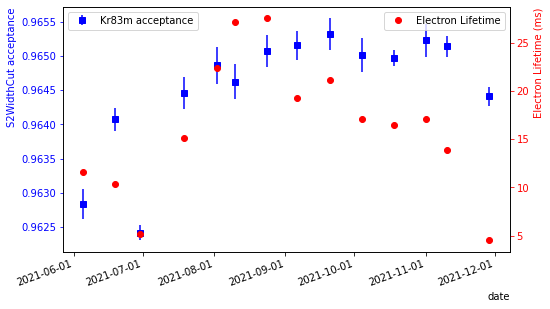

In [154]:
plt_acc_elife(times, acc_kr, acc_kr_err_l, acc_kr_err_h,elife)

/tmp/jobs/22598978/ipykernel_159/2018530190.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dates,rotation=20, ha='right')


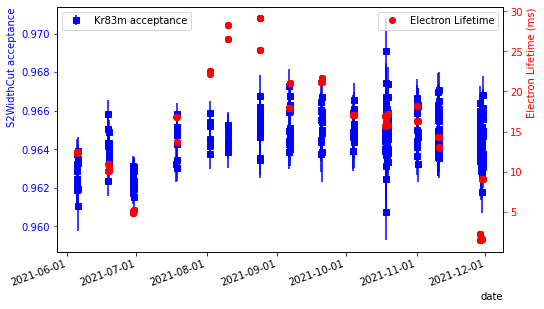

In [156]:
plt_acc_elife(tt, a_kr, a_kr_err_l, a_kr_err_h, e_life)

# BACKGROUND STUDY

In [11]:
dsets = st.select_runs(run_mode='background_linked',available='event_info',
                       exclude_tags=('bad','messy','hot_spot','ramp_up'))

In [12]:
dsets0 = dsets[(dsets.end > pd.to_datetime('07/25/2022')) & (dsets.end < pd.to_datetime('08/07/2022'))]
dsets1 = dsets[(dsets.end > pd.to_datetime('05/01/2022')) & (dsets.end < pd.to_datetime('07/01/2022'))]

In [13]:
bkg_runs0 = dsets0.name.values[:]
bkg_runs1 = dsets1.name.values[:]
print(len(bkg_runs0), len(bkg_runs1))

101 780


In [14]:
ddir = '/dali/lgrandi/dandrea/data'
#evbkg0 = ddu.merge_runs(st,bkg_runs0[:])
#evbkg0.to_pickle(f'{ddir}/SR0_bkg_{bkg_runs0[0]}_{bkg_runs0[-1]}_EventInfo.pkl')
evbkg0 = pd.read_pickle(f'{ddir}/SR0_bkg_{bkg_runs0[0]}_{bkg_runs0[-1]}_EventInfo.pkl')

In [18]:
evbkg1 = ddu.merge_runs(st,bkg_runs1[:500])
evbkg1.to_pickle(f'{ddir}/SR0_bkg_{bkg_runs1[0]}_{bkg_runs1[500]}_EventInfo.pkl')
#evbkg1 = pd.read_pickle(f'{ddir}/SR0_bkg_{bkg_runs1[0]}_{bkg_runs1[3000]}_EventInfo.pkl')

Reading runs from 044317 to 045329
n. 4 run 045324 elapsed time: 0.79 s
n. 9 run 045319 elapsed time: 1.81 s
n. 14 run 045314 elapsed time: 2.88 s
n. 19 run 045309 elapsed time: 3.93 s
n. 24 run 045304 elapsed time: 5.05 s
n. 29 run 045299 elapsed time: 6.22 s
n. 34 run 045294 elapsed time: 7.45 s
n. 39 run 045289 elapsed time: 8.69 s
n. 44 run 045284 elapsed time: 10.06 s
n. 49 run 045279 elapsed time: 11.52 s
n. 54 run 045274 elapsed time: 13.05 s
n. 59 run 045269 elapsed time: 14.56 s
n. 64 run 045264 elapsed time: 16.11 s
n. 69 run 045259 elapsed time: 17.71 s
n. 74 run 045254 elapsed time: 19.36 s
n. 79 run 045249 elapsed time: 21.04 s
n. 84 run 045244 elapsed time: 22.76 s
n. 89 run 045239 elapsed time: 24.52 s
n. 94 run 045234 elapsed time: 26.46 s
n. 99 run 045229 elapsed time: 28.50 s
n. 104 run 045224 elapsed time: 30.62 s
n. 109 run 045217 elapsed time: 32.81 s
n. 114 run 045212 elapsed time: 35.06 s
n. 119 run 045207 elapsed time: 37.35 s
n. 124 run 045202 elapsed time: 39.

/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


total events 369821
Lower and higher boundary provided externally
param_parabola_low: [0.00487747 0.09634786 0.19632401]
param_parabola_high: [ 0.12086553 -1.2295208   4.37596581]
Cut: total 369821, survived 247819 -> 67.01%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


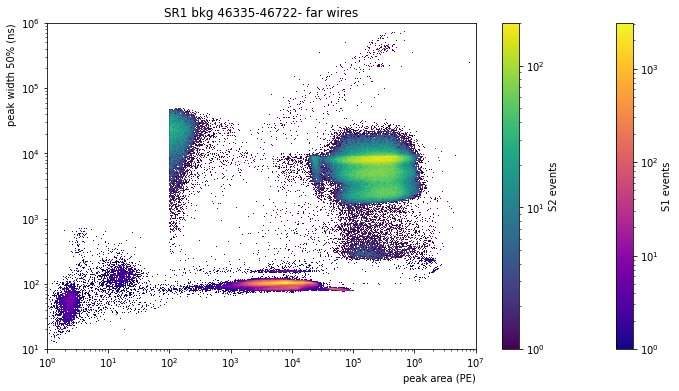

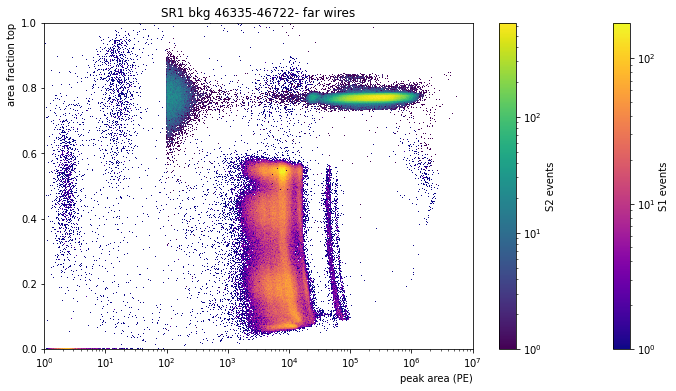

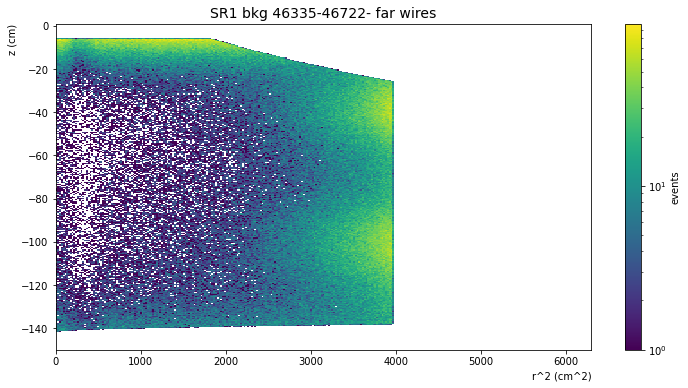

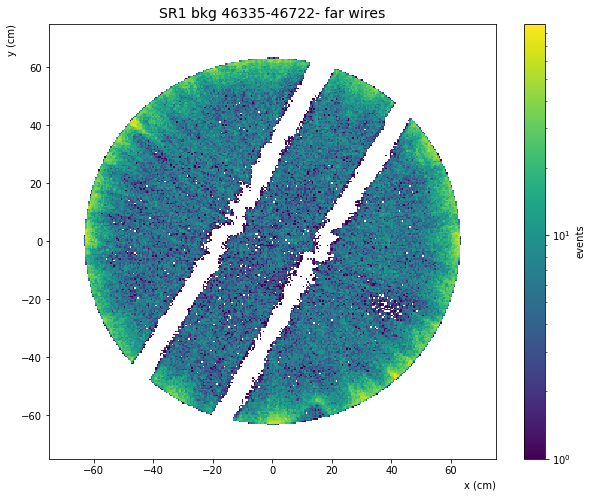

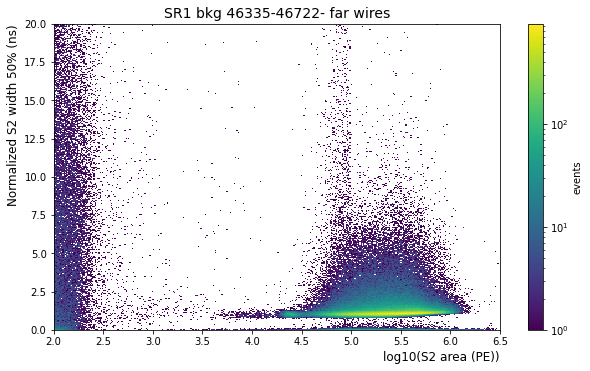

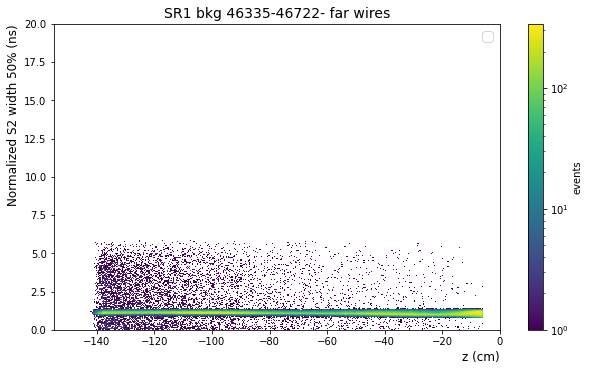

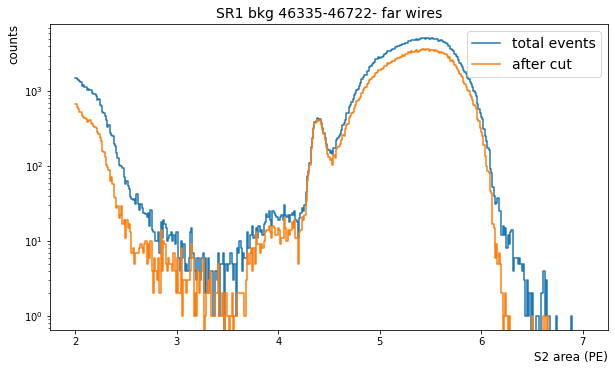

In [22]:
fit_par = (( 0.75785949,3.18263529,1.26349891), ( 4.74467848,1.34106577,1.99650474,1.02559667 ))
maskFW, maskNW = wcu.mask_S2Width_vs_pos(evbkg0)
#maskFV = ddu.mask_FV(evbkg0)
FiducialVolume = st.get_single_plugin('030000', 'cut_fiducial_volume')
maskFV = FiducialVolume.cut_by(evbkg0)
evv0 = evbkg0[maskFW & maskFV]
title='SR1 bkg 46335-46722 far wires'
ddu.plot_area_width_aft(evv0, title)
wcu.plot_r2z_xy(evv0,title)
cut_ = wcu.S2WidthCut(evv0, title=title, mod_par=par, bins=400,ext_par=fit_par,
                      wrange=(0,20), arange = (2.,6.5), plot = 1, perc_plot=0)

/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


total events 338926
Lower and higher boundary provided externally
param_parabola_low: [0.00487747 0.09634786 0.19632401]
param_parabola_high: [ 0.12086553 -1.2295208   4.37596581]
Cut: total 338926, survived 239575 -> 70.69%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


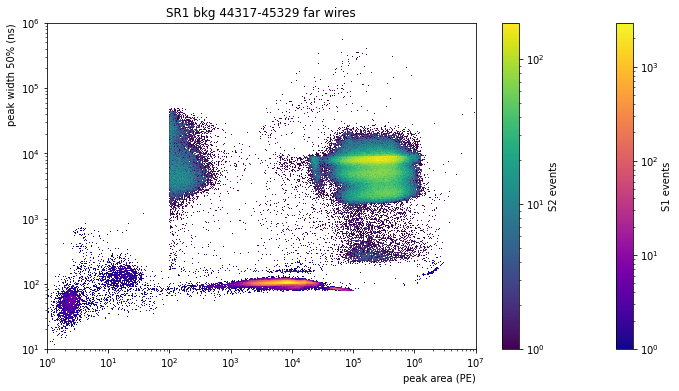

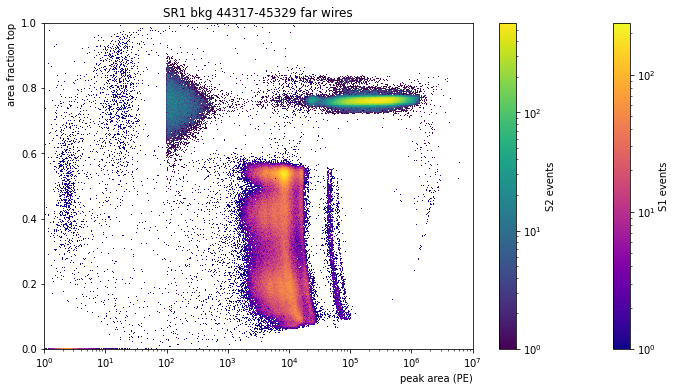

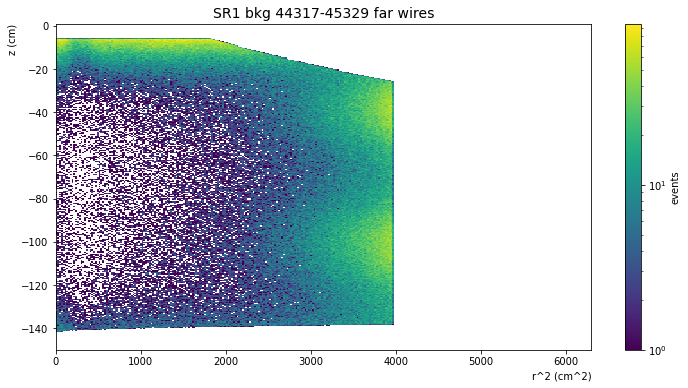

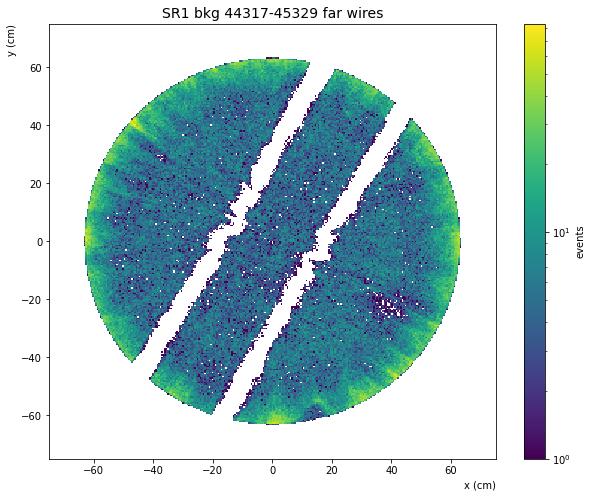

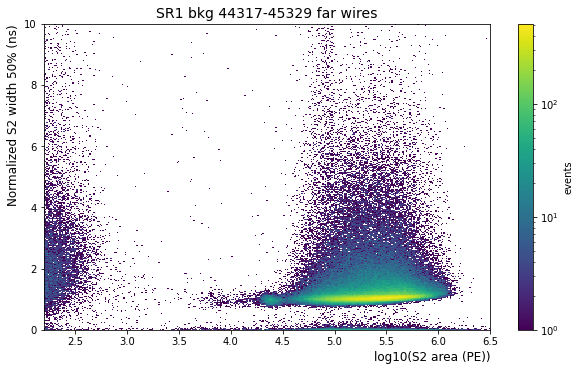

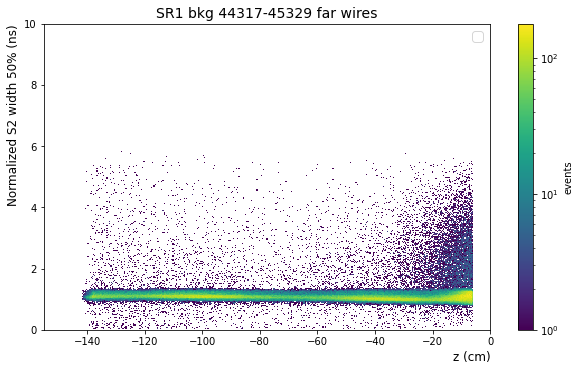

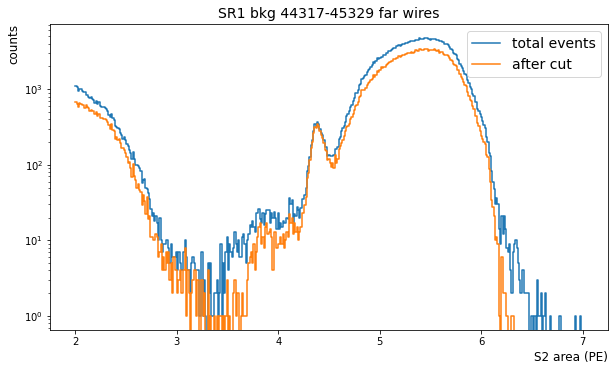

In [20]:
maskFW, maskNW = wcu.mask_S2Width_vs_pos(evbkg1)
maskFV = FiducialVolume.cut_by(evbkg1)
evv1 = evbkg1[maskFW & maskFV]
title='SR1 bkg 44317-45329 far wires'
ddu.plot_area_width_aft(evv1, title)
wcu.plot_r2z_xy(evv1,title)
cut_ = wcu.S2WidthCut(evv1, title=title, mod_par=par, bins=400,ext_par=fit_par,
                      wrange=(0,10), arange = (2.2,6.5), plot = 1, perc_plot=0)

In [36]:
import bokeh.plotting as bklt
from IPython.core.display import display, HTML
def display_events(st,run_id, nev = 1, area_cut=(1e2,1e7)):
    if (st.is_stored(run_id, ('event_info'))==False): return print('No events stored')
    ev0 = st.get_array(run_id,['event_info', 'cut_fiducial_volume'],progress_bar=False)
    maskFW, maskNW = wcu.mask_S2Width_vs_pos(ev0)
    mask = (ev0['s2_area'] > area_cut[0]) & (ev0['s2_area'] < area_cut[1])
    ev = ev0[maskFW & ev0['cut_fiducial_volume']]
    events = ev0[mask & maskFW & ev0['cut_fiducial_volume']]
    print('total events',len(ev0),'\nafter FV & far wires',len(ev),'\nafter area selection',len(events))
    for i in range(nev):
        idx = int(np.random.rand()*len(events))
        fig = st.event_display_interactive(run_id,
                                           time_range=(events[idx]['time'],
                                                       events[idx]['endtime']),
                                           bottom_pmt_array=False)
        bklt.show(fig)

/tmp/jobs/21986510/ipykernel_2671/2738366215.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [39]:
display_events(st,'046722', nev = 10, area_cut=(0,1e3))

total events 60065 
after FV & far wires 8708 
after area selection 784


/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/straxen/analyses/bokeh_waveform_plot.py:562: RuntimeWarning: divide by zero encountered in log10
  area_plot = np.log10(area_per_channel)
